# Data preprocessing

In [3]:
import os
from tqdm.auto import tqdm
tqdm.pandas()

In [4]:
!wget -c https://files.deeppavlov.ai/field-matters/releases/demo/sound.zip
!wget -c https://files.deeppavlov.ai/field-matters/releases/demo/dia_data.csv
!unzip /Users/dusan/Downloads/dia_sound.zip #your audios here

--2022-07-31 06:01:01--  https://files.deeppavlov.ai/field-matters/releases/demo/sound.zip
Resolving files.deeppavlov.ai (files.deeppavlov.ai)... 178.63.27.41
Connecting to files.deeppavlov.ai (files.deeppavlov.ai)|178.63.27.41|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1198165394 (1.1G) [application/zip]
Saving to: ‘sound.zip’

sound.zip           100%[===================>]   1.12G  20.5MB/s    in 66s     

2022-07-31 06:02:07 (17.4 MB/s) - ‘sound.zip’ saved [1198165394/1198165394]

--2022-07-31 06:02:07--  https://files.deeppavlov.ai/field-matters/releases/demo/dia_data.csv
Resolving files.deeppavlov.ai (files.deeppavlov.ai)... 178.63.27.41
Connecting to files.deeppavlov.ai (files.deeppavlov.ai)|178.63.27.41|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 158486 (155K) [application/octet-stream]
Saving to: ‘dia_data.csv’

dia_data.csv        100%[===================>] 154.77K   346KB/s    in 0.4s    

2022-07-31 06:02:08 (346 K

  inflating: dia_test_audio_to_release/sah/game_2605-3500s-2-6.mp4  
  inflating: dia_test_audio_to_release/sah/game_2605-3500s-2-7.mp4  
  inflating: dia_test_audio_to_release/sah/game_2605-3500s-2-8.mp4  
  inflating: dia_test_audio_to_release/sah/game_2605-3500s-2-9.mp4  
  inflating: dia_test_audio_to_release/sah/game_3500-4400s-0-0.mp4  
  inflating: dia_test_audio_to_release/sah/game_3500-4400s-0-1.mp4  
  inflating: dia_test_audio_to_release/sah/game_3500-4400s-0-11.mp4  
  inflating: dia_test_audio_to_release/sah/game_3500-4400s-0-13.mp4  
  inflating: dia_test_audio_to_release/sah/game_3500-4400s-0-4.mp4  
  inflating: dia_test_audio_to_release/sah/game_3500-4400s-0-5.mp4  
  inflating: dia_test_audio_to_release/sah/game_3500-4400s-0-7.mp4  
  inflating: dia_test_audio_to_release/sah/game_3500-4400s-0-8.mp4  
  inflating: dia_test_audio_to_release/sah/game_3500-4400s-1-0.mp4  
  inflating: dia_test_audio_to_release/sah/game_3500-4400s-1-10.mp4  
  inflating: dia_test_audio_to_

  inflating: dia_test_audio_to_release/sah/game_6200-7100s-1-9.mp4  
  inflating: dia_test_audio_to_release/sah/game_6200-7100s-2-0.mp4  
  inflating: dia_test_audio_to_release/sah/game_6200-7100s-2-1.mp4  
  inflating: dia_test_audio_to_release/sah/game_6200-7100s-2-10.mp4  
  inflating: dia_test_audio_to_release/sah/game_6200-7100s-2-12.mp4  
  inflating: dia_test_audio_to_release/sah/game_6200-7100s-2-2.mp4  
  inflating: dia_test_audio_to_release/sah/game_6200-7100s-2-3.mp4  
  inflating: dia_test_audio_to_release/sah/game_6200-7100s-2-5.mp4  
  inflating: dia_test_audio_to_release/sah/game_6200-7100s-2-6.mp4  
  inflating: dia_test_audio_to_release/sah/game_6200-7100s-2-8.mp4  
  inflating: dia_test_audio_to_release/sah/game_6200-7100s-2-9.mp4  
  inflating: dia_test_audio_to_release/sah/game_7100-8000s-0-0.mp4  
  inflating: dia_test_audio_to_release/sah/game_7100-8000s-0-1.mp4  
  inflating: dia_test_audio_to_release/sah/game_7100-8000s-0-10.mp4  
  inflating: dia_test_audio_to_

In [22]:
import pandas as pd
df = pd.read_csv('/Users/dusan/Downloads/dia_data.csv') #your dataset

In [23]:
df['fpath'] = './audio_to_release/' + df['lang'] + '/' + df['source']

In [24]:
df['fpath'] = df['fpath'].apply(lambda x: x.replace(' ', '_')) #removing spaces in dataset's paths

In [25]:
all_paths = df['fpath']
all_paths = list(set(all_paths))

In [26]:
df = df.reset_index() #adding indexes(id)

In [27]:
df2 = pd.DataFrame(df.drop(['speaker', 'source', 'lang', 'index'], axis=1).groupby('fpath').apply(dict)).reset_index()
df2['coord_start'] = df2[0].apply(lambda x: list(x['start'])[0])
df2['coord_end'] = df2[0].apply(lambda x: list(x['end'])[-1])
df2

,fpath,0,coord_start,coord_end
0,./audio_to_release/mhr/mhr-StTor-100118-ANF_ZV...,"{'start': [19.529, 21.29600000000005, 26.51099...",19.529,38.354
1,./audio_to_release/mhr/mhr-StTor-100118-ANF_ZV...,"{'start': [20.15099999999996, 21.3250000000000...",20.151,39.441
2,./audio_to_release/mhr/mhr-StTor-100118-ANF_ZV...,"{'start': [20.42399999999997, 23.0630000000001...",20.424,38.767
3,./audio_to_release/mhr/mhr-StTor-100118-ANF_ZV...,"{'start': [22.1099999999999, 22.75900000000001...",22.110,40.325
4,./audio_to_release/mhr/mhr-StTor-100118-ANF_ZV...,"{'start': [18.18100000000001, 22.435, 23.064, ...",18.181,41.311
...,...,...,...,...
209,./audio_to_release/sah/game_885-1785s-2-2.mp4,"{'start': [21.167, 21.857, 22.52600000000001, ...",21.167,37.762
210,./audio_to_release/sah/game_885-1785s-2-3.mp4,"{'start': [25.99700000000001, 30.4470000000000...",25.997,41.180
211,./audio_to_release/sah/game_885-1785s-2-4.mp4,"{'start': [21.35500000000001, 22.3740000000000...",21.355,42.167
212,./audio_to_release/yrk/TOYa_audio_TNenets.wav,"{'start': [0.2339999999999999, 5.8039999999999...",0.234,39.866


In [28]:
def cutter(row): #cutting files accroding to timecodes
    fpath, start, end, index = row["fpath"], row["coord_start"], row["coord_end"], row["fpath"]
    !ffmpeg -n -i {fpath} -ss {str(start)} -to {str(end)} -ar 16000 \
     {str(index)}.wav

    
df2.progress_apply(cutter, axis=1)

  0%|          | 0/214 [00:00<?, ?it/s]

ffmpeg version 4.4.2 Copyright (c) 2000-2021 the FFmpeg developers
  built with clang version 13.0.1
  configuration: --prefix=/Users/runner/miniforge3/conda-bld/ffmpeg_1658782027982/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_pl --cc=arm64-apple-darwin20.0.0-clang --cxx=arm64-apple-darwin20.0.0-clang++ --nm=arm64-apple-darwin20.0.0-nm --ar=arm64-apple-darwin20.0.0-ar --disable-doc --disable-openssl --enable-avresample --enable-demuxer=dash --enable-hardcoded-tables --enable-libfreetype --enable-libfontconfig --enable-libopenh264 --enable-cross-compile --arch=arm64 --target-os=darwin --cross-prefix=arm64-apple-darwin20.0.0- --host-cc=/Users/runner/miniforge3/conda-bld/ffmpeg_1658782027982/_build_env/bin/x86_64-apple-darwin13.4.0-clang --enable-neon --enable-gnutls --enable-libmp3lame --enable-libvpx --enable-pthreads --enable-gpl --ena

ffmpeg version 4.4.2 Copyright (c) 2000-2021 the FFmpeg developers
  built with clang version 13.0.1
  configuration: --prefix=/Users/runner/miniforge3/conda-bld/ffmpeg_1658782027982/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_pl --cc=arm64-apple-darwin20.0.0-clang --cxx=arm64-apple-darwin20.0.0-clang++ --nm=arm64-apple-darwin20.0.0-nm --ar=arm64-apple-darwin20.0.0-ar --disable-doc --disable-openssl --enable-avresample --enable-demuxer=dash --enable-hardcoded-tables --enable-libfreetype --enable-libfontconfig --enable-libopenh264 --enable-cross-compile --arch=arm64 --target-os=darwin --cross-prefix=arm64-apple-darwin20.0.0- --host-cc=/Users/runner/miniforge3/conda-bld/ffmpeg_1658782027982/_build_env/bin/x86_64-apple-darwin13.4.0-clang --enable-neon --enable-gnutls --enable-libmp3lame --enable-libvpx --enable-pthreads --enable-gpl --ena

ffmpeg version 4.4.2 Copyright (c) 2000-2021 the FFmpeg developers
  built with clang version 13.0.1
  configuration: --prefix=/Users/runner/miniforge3/conda-bld/ffmpeg_1658782027982/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_pl --cc=arm64-apple-darwin20.0.0-clang --cxx=arm64-apple-darwin20.0.0-clang++ --nm=arm64-apple-darwin20.0.0-nm --ar=arm64-apple-darwin20.0.0-ar --disable-doc --disable-openssl --enable-avresample --enable-demuxer=dash --enable-hardcoded-tables --enable-libfreetype --enable-libfontconfig --enable-libopenh264 --enable-cross-compile --arch=arm64 --target-os=darwin --cross-prefix=arm64-apple-darwin20.0.0- --host-cc=/Users/runner/miniforge3/conda-bld/ffmpeg_1658782027982/_build_env/bin/x86_64-apple-darwin13.4.0-clang --enable-neon --enable-gnutls --enable-libmp3lame --enable-libvpx --enable-pthreads --enable-gpl --ena

ffmpeg version 4.4.2 Copyright (c) 2000-2021 the FFmpeg developers
  built with clang version 13.0.1
  configuration: --prefix=/Users/runner/miniforge3/conda-bld/ffmpeg_1658782027982/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_pl --cc=arm64-apple-darwin20.0.0-clang --cxx=arm64-apple-darwin20.0.0-clang++ --nm=arm64-apple-darwin20.0.0-nm --ar=arm64-apple-darwin20.0.0-ar --disable-doc --disable-openssl --enable-avresample --enable-demuxer=dash --enable-hardcoded-tables --enable-libfreetype --enable-libfontconfig --enable-libopenh264 --enable-cross-compile --arch=arm64 --target-os=darwin --cross-prefix=arm64-apple-darwin20.0.0- --host-cc=/Users/runner/miniforge3/conda-bld/ffmpeg_1658782027982/_build_env/bin/x86_64-apple-darwin13.4.0-clang --enable-neon --enable-gnutls --enable-libmp3lame --enable-libvpx --enable-pthreads --enable-gpl --ena

ffmpeg version 4.4.2 Copyright (c) 2000-2021 the FFmpeg developers
  built with clang version 13.0.1
  configuration: --prefix=/Users/runner/miniforge3/conda-bld/ffmpeg_1658782027982/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_pl --cc=arm64-apple-darwin20.0.0-clang --cxx=arm64-apple-darwin20.0.0-clang++ --nm=arm64-apple-darwin20.0.0-nm --ar=arm64-apple-darwin20.0.0-ar --disable-doc --disable-openssl --enable-avresample --enable-demuxer=dash --enable-hardcoded-tables --enable-libfreetype --enable-libfontconfig --enable-libopenh264 --enable-cross-compile --arch=arm64 --target-os=darwin --cross-prefix=arm64-apple-darwin20.0.0- --host-cc=/Users/runner/miniforge3/conda-bld/ffmpeg_1658782027982/_build_env/bin/x86_64-apple-darwin13.4.0-clang --enable-neon --enable-gnutls --enable-libmp3lame --enable-libvpx --enable-pthreads --enable-gpl --ena

ffmpeg version 4.4.2 Copyright (c) 2000-2021 the FFmpeg developers
  built with clang version 13.0.1
  configuration: --prefix=/Users/runner/miniforge3/conda-bld/ffmpeg_1658782027982/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_pl --cc=arm64-apple-darwin20.0.0-clang --cxx=arm64-apple-darwin20.0.0-clang++ --nm=arm64-apple-darwin20.0.0-nm --ar=arm64-apple-darwin20.0.0-ar --disable-doc --disable-openssl --enable-avresample --enable-demuxer=dash --enable-hardcoded-tables --enable-libfreetype --enable-libfontconfig --enable-libopenh264 --enable-cross-compile --arch=arm64 --target-os=darwin --cross-prefix=arm64-apple-darwin20.0.0- --host-cc=/Users/runner/miniforge3/conda-bld/ffmpeg_1658782027982/_build_env/bin/x86_64-apple-darwin13.4.0-clang --enable-neon --enable-gnutls --enable-libmp3lame --enable-libvpx --enable-pthreads --enable-gpl --ena

ffmpeg version 4.4.2 Copyright (c) 2000-2021 the FFmpeg developers
  built with clang version 13.0.1
  configuration: --prefix=/Users/runner/miniforge3/conda-bld/ffmpeg_1658782027982/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_pl --cc=arm64-apple-darwin20.0.0-clang --cxx=arm64-apple-darwin20.0.0-clang++ --nm=arm64-apple-darwin20.0.0-nm --ar=arm64-apple-darwin20.0.0-ar --disable-doc --disable-openssl --enable-avresample --enable-demuxer=dash --enable-hardcoded-tables --enable-libfreetype --enable-libfontconfig --enable-libopenh264 --enable-cross-compile --arch=arm64 --target-os=darwin --cross-prefix=arm64-apple-darwin20.0.0- --host-cc=/Users/runner/miniforge3/conda-bld/ffmpeg_1658782027982/_build_env/bin/x86_64-apple-darwin13.4.0-clang --enable-neon --enable-gnutls --enable-libmp3lame --enable-libvpx --enable-pthreads --enable-gpl --ena

ffmpeg version 4.4.2 Copyright (c) 2000-2021 the FFmpeg developers
  built with clang version 13.0.1
  configuration: --prefix=/Users/runner/miniforge3/conda-bld/ffmpeg_1658782027982/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_pl --cc=arm64-apple-darwin20.0.0-clang --cxx=arm64-apple-darwin20.0.0-clang++ --nm=arm64-apple-darwin20.0.0-nm --ar=arm64-apple-darwin20.0.0-ar --disable-doc --disable-openssl --enable-avresample --enable-demuxer=dash --enable-hardcoded-tables --enable-libfreetype --enable-libfontconfig --enable-libopenh264 --enable-cross-compile --arch=arm64 --target-os=darwin --cross-prefix=arm64-apple-darwin20.0.0- --host-cc=/Users/runner/miniforge3/conda-bld/ffmpeg_1658782027982/_build_env/bin/x86_64-apple-darwin13.4.0-clang --enable-neon --enable-gnutls --enable-libmp3lame --enable-libvpx --enable-pthreads --enable-gpl --ena

ffmpeg version 4.4.2 Copyright (c) 2000-2021 the FFmpeg developers
  built with clang version 13.0.1
  configuration: --prefix=/Users/runner/miniforge3/conda-bld/ffmpeg_1658782027982/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_pl --cc=arm64-apple-darwin20.0.0-clang --cxx=arm64-apple-darwin20.0.0-clang++ --nm=arm64-apple-darwin20.0.0-nm --ar=arm64-apple-darwin20.0.0-ar --disable-doc --disable-openssl --enable-avresample --enable-demuxer=dash --enable-hardcoded-tables --enable-libfreetype --enable-libfontconfig --enable-libopenh264 --enable-cross-compile --arch=arm64 --target-os=darwin --cross-prefix=arm64-apple-darwin20.0.0- --host-cc=/Users/runner/miniforge3/conda-bld/ffmpeg_1658782027982/_build_env/bin/x86_64-apple-darwin13.4.0-clang --enable-neon --enable-gnutls --enable-libmp3lame --enable-libvpx --enable-pthreads --enable-gpl --ena

ffmpeg version 4.4.2 Copyright (c) 2000-2021 the FFmpeg developers
  built with clang version 13.0.1
  configuration: --prefix=/Users/runner/miniforge3/conda-bld/ffmpeg_1658782027982/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_pl --cc=arm64-apple-darwin20.0.0-clang --cxx=arm64-apple-darwin20.0.0-clang++ --nm=arm64-apple-darwin20.0.0-nm --ar=arm64-apple-darwin20.0.0-ar --disable-doc --disable-openssl --enable-avresample --enable-demuxer=dash --enable-hardcoded-tables --enable-libfreetype --enable-libfontconfig --enable-libopenh264 --enable-cross-compile --arch=arm64 --target-os=darwin --cross-prefix=arm64-apple-darwin20.0.0- --host-cc=/Users/runner/miniforge3/conda-bld/ffmpeg_1658782027982/_build_env/bin/x86_64-apple-darwin13.4.0-clang --enable-neon --enable-gnutls --enable-libmp3lame --enable-libvpx --enable-pthreads --enable-gpl --ena

ffmpeg version 4.4.2 Copyright (c) 2000-2021 the FFmpeg developers
  built with clang version 13.0.1
  configuration: --prefix=/Users/runner/miniforge3/conda-bld/ffmpeg_1658782027982/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_pl --cc=arm64-apple-darwin20.0.0-clang --cxx=arm64-apple-darwin20.0.0-clang++ --nm=arm64-apple-darwin20.0.0-nm --ar=arm64-apple-darwin20.0.0-ar --disable-doc --disable-openssl --enable-avresample --enable-demuxer=dash --enable-hardcoded-tables --enable-libfreetype --enable-libfontconfig --enable-libopenh264 --enable-cross-compile --arch=arm64 --target-os=darwin --cross-prefix=arm64-apple-darwin20.0.0- --host-cc=/Users/runner/miniforge3/conda-bld/ffmpeg_1658782027982/_build_env/bin/x86_64-apple-darwin13.4.0-clang --enable-neon --enable-gnutls --enable-libmp3lame --enable-libvpx --enable-pthreads --enable-gpl --ena

ffmpeg version 4.4.2 Copyright (c) 2000-2021 the FFmpeg developers
  built with clang version 13.0.1
  configuration: --prefix=/Users/runner/miniforge3/conda-bld/ffmpeg_1658782027982/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_pl --cc=arm64-apple-darwin20.0.0-clang --cxx=arm64-apple-darwin20.0.0-clang++ --nm=arm64-apple-darwin20.0.0-nm --ar=arm64-apple-darwin20.0.0-ar --disable-doc --disable-openssl --enable-avresample --enable-demuxer=dash --enable-hardcoded-tables --enable-libfreetype --enable-libfontconfig --enable-libopenh264 --enable-cross-compile --arch=arm64 --target-os=darwin --cross-prefix=arm64-apple-darwin20.0.0- --host-cc=/Users/runner/miniforge3/conda-bld/ffmpeg_1658782027982/_build_env/bin/x86_64-apple-darwin13.4.0-clang --enable-neon --enable-gnutls --enable-libmp3lame --enable-libvpx --enable-pthreads --enable-gpl --ena

ffmpeg version 4.4.2 Copyright (c) 2000-2021 the FFmpeg developers
  built with clang version 13.0.1
  configuration: --prefix=/Users/runner/miniforge3/conda-bld/ffmpeg_1658782027982/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_pl --cc=arm64-apple-darwin20.0.0-clang --cxx=arm64-apple-darwin20.0.0-clang++ --nm=arm64-apple-darwin20.0.0-nm --ar=arm64-apple-darwin20.0.0-ar --disable-doc --disable-openssl --enable-avresample --enable-demuxer=dash --enable-hardcoded-tables --enable-libfreetype --enable-libfontconfig --enable-libopenh264 --enable-cross-compile --arch=arm64 --target-os=darwin --cross-prefix=arm64-apple-darwin20.0.0- --host-cc=/Users/runner/miniforge3/conda-bld/ffmpeg_1658782027982/_build_env/bin/x86_64-apple-darwin13.4.0-clang --enable-neon --enable-gnutls --enable-libmp3lame --enable-libvpx --enable-pthreads --enable-gpl --ena

ffmpeg version 4.4.2 Copyright (c) 2000-2021 the FFmpeg developers
  built with clang version 13.0.1
  configuration: --prefix=/Users/runner/miniforge3/conda-bld/ffmpeg_1658782027982/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_pl --cc=arm64-apple-darwin20.0.0-clang --cxx=arm64-apple-darwin20.0.0-clang++ --nm=arm64-apple-darwin20.0.0-nm --ar=arm64-apple-darwin20.0.0-ar --disable-doc --disable-openssl --enable-avresample --enable-demuxer=dash --enable-hardcoded-tables --enable-libfreetype --enable-libfontconfig --enable-libopenh264 --enable-cross-compile --arch=arm64 --target-os=darwin --cross-prefix=arm64-apple-darwin20.0.0- --host-cc=/Users/runner/miniforge3/conda-bld/ffmpeg_1658782027982/_build_env/bin/x86_64-apple-darwin13.4.0-clang --enable-neon --enable-gnutls --enable-libmp3lame --enable-libvpx --enable-pthreads --enable-gpl --ena

ffmpeg version 4.4.2 Copyright (c) 2000-2021 the FFmpeg developers
  built with clang version 13.0.1
  configuration: --prefix=/Users/runner/miniforge3/conda-bld/ffmpeg_1658782027982/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_pl --cc=arm64-apple-darwin20.0.0-clang --cxx=arm64-apple-darwin20.0.0-clang++ --nm=arm64-apple-darwin20.0.0-nm --ar=arm64-apple-darwin20.0.0-ar --disable-doc --disable-openssl --enable-avresample --enable-demuxer=dash --enable-hardcoded-tables --enable-libfreetype --enable-libfontconfig --enable-libopenh264 --enable-cross-compile --arch=arm64 --target-os=darwin --cross-prefix=arm64-apple-darwin20.0.0- --host-cc=/Users/runner/miniforge3/conda-bld/ffmpeg_1658782027982/_build_env/bin/x86_64-apple-darwin13.4.0-clang --enable-neon --enable-gnutls --enable-libmp3lame --enable-libvpx --enable-pthreads --enable-gpl --ena

ffmpeg version 4.4.2 Copyright (c) 2000-2021 the FFmpeg developers
  built with clang version 13.0.1
  configuration: --prefix=/Users/runner/miniforge3/conda-bld/ffmpeg_1658782027982/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_pl --cc=arm64-apple-darwin20.0.0-clang --cxx=arm64-apple-darwin20.0.0-clang++ --nm=arm64-apple-darwin20.0.0-nm --ar=arm64-apple-darwin20.0.0-ar --disable-doc --disable-openssl --enable-avresample --enable-demuxer=dash --enable-hardcoded-tables --enable-libfreetype --enable-libfontconfig --enable-libopenh264 --enable-cross-compile --arch=arm64 --target-os=darwin --cross-prefix=arm64-apple-darwin20.0.0- --host-cc=/Users/runner/miniforge3/conda-bld/ffmpeg_1658782027982/_build_env/bin/x86_64-apple-darwin13.4.0-clang --enable-neon --enable-gnutls --enable-libmp3lame --enable-libvpx --enable-pthreads --enable-gpl --ena

ffmpeg version 4.4.2 Copyright (c) 2000-2021 the FFmpeg developers
  built with clang version 13.0.1
  configuration: --prefix=/Users/runner/miniforge3/conda-bld/ffmpeg_1658782027982/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_pl --cc=arm64-apple-darwin20.0.0-clang --cxx=arm64-apple-darwin20.0.0-clang++ --nm=arm64-apple-darwin20.0.0-nm --ar=arm64-apple-darwin20.0.0-ar --disable-doc --disable-openssl --enable-avresample --enable-demuxer=dash --enable-hardcoded-tables --enable-libfreetype --enable-libfontconfig --enable-libopenh264 --enable-cross-compile --arch=arm64 --target-os=darwin --cross-prefix=arm64-apple-darwin20.0.0- --host-cc=/Users/runner/miniforge3/conda-bld/ffmpeg_1658782027982/_build_env/bin/x86_64-apple-darwin13.4.0-clang --enable-neon --enable-gnutls --enable-libmp3lame --enable-libvpx --enable-pthreads --enable-gpl --ena

ffmpeg version 4.4.2 Copyright (c) 2000-2021 the FFmpeg developers
  built with clang version 13.0.1
  configuration: --prefix=/Users/runner/miniforge3/conda-bld/ffmpeg_1658782027982/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_pl --cc=arm64-apple-darwin20.0.0-clang --cxx=arm64-apple-darwin20.0.0-clang++ --nm=arm64-apple-darwin20.0.0-nm --ar=arm64-apple-darwin20.0.0-ar --disable-doc --disable-openssl --enable-avresample --enable-demuxer=dash --enable-hardcoded-tables --enable-libfreetype --enable-libfontconfig --enable-libopenh264 --enable-cross-compile --arch=arm64 --target-os=darwin --cross-prefix=arm64-apple-darwin20.0.0- --host-cc=/Users/runner/miniforge3/conda-bld/ffmpeg_1658782027982/_build_env/bin/x86_64-apple-darwin13.4.0-clang --enable-neon --enable-gnutls --enable-libmp3lame --enable-libvpx --enable-pthreads --enable-gpl --ena

ffmpeg version 4.4.2 Copyright (c) 2000-2021 the FFmpeg developers
  built with clang version 13.0.1
  configuration: --prefix=/Users/runner/miniforge3/conda-bld/ffmpeg_1658782027982/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_pl --cc=arm64-apple-darwin20.0.0-clang --cxx=arm64-apple-darwin20.0.0-clang++ --nm=arm64-apple-darwin20.0.0-nm --ar=arm64-apple-darwin20.0.0-ar --disable-doc --disable-openssl --enable-avresample --enable-demuxer=dash --enable-hardcoded-tables --enable-libfreetype --enable-libfontconfig --enable-libopenh264 --enable-cross-compile --arch=arm64 --target-os=darwin --cross-prefix=arm64-apple-darwin20.0.0- --host-cc=/Users/runner/miniforge3/conda-bld/ffmpeg_1658782027982/_build_env/bin/x86_64-apple-darwin13.4.0-clang --enable-neon --enable-gnutls --enable-libmp3lame --enable-libvpx --enable-pthreads --enable-gpl --ena

ffmpeg version 4.4.2 Copyright (c) 2000-2021 the FFmpeg developers
  built with clang version 13.0.1
  configuration: --prefix=/Users/runner/miniforge3/conda-bld/ffmpeg_1658782027982/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_pl --cc=arm64-apple-darwin20.0.0-clang --cxx=arm64-apple-darwin20.0.0-clang++ --nm=arm64-apple-darwin20.0.0-nm --ar=arm64-apple-darwin20.0.0-ar --disable-doc --disable-openssl --enable-avresample --enable-demuxer=dash --enable-hardcoded-tables --enable-libfreetype --enable-libfontconfig --enable-libopenh264 --enable-cross-compile --arch=arm64 --target-os=darwin --cross-prefix=arm64-apple-darwin20.0.0- --host-cc=/Users/runner/miniforge3/conda-bld/ffmpeg_1658782027982/_build_env/bin/x86_64-apple-darwin13.4.0-clang --enable-neon --enable-gnutls --enable-libmp3lame --enable-libvpx --enable-pthreads --enable-gpl --ena

ffmpeg version 4.4.2 Copyright (c) 2000-2021 the FFmpeg developers
  built with clang version 13.0.1
  configuration: --prefix=/Users/runner/miniforge3/conda-bld/ffmpeg_1658782027982/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_pl --cc=arm64-apple-darwin20.0.0-clang --cxx=arm64-apple-darwin20.0.0-clang++ --nm=arm64-apple-darwin20.0.0-nm --ar=arm64-apple-darwin20.0.0-ar --disable-doc --disable-openssl --enable-avresample --enable-demuxer=dash --enable-hardcoded-tables --enable-libfreetype --enable-libfontconfig --enable-libopenh264 --enable-cross-compile --arch=arm64 --target-os=darwin --cross-prefix=arm64-apple-darwin20.0.0- --host-cc=/Users/runner/miniforge3/conda-bld/ffmpeg_1658782027982/_build_env/bin/x86_64-apple-darwin13.4.0-clang --enable-neon --enable-gnutls --enable-libmp3lame --enable-libvpx --enable-pthreads --enable-gpl --ena

ffmpeg version 4.4.2 Copyright (c) 2000-2021 the FFmpeg developers
  built with clang version 13.0.1
  configuration: --prefix=/Users/runner/miniforge3/conda-bld/ffmpeg_1658782027982/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_pl --cc=arm64-apple-darwin20.0.0-clang --cxx=arm64-apple-darwin20.0.0-clang++ --nm=arm64-apple-darwin20.0.0-nm --ar=arm64-apple-darwin20.0.0-ar --disable-doc --disable-openssl --enable-avresample --enable-demuxer=dash --enable-hardcoded-tables --enable-libfreetype --enable-libfontconfig --enable-libopenh264 --enable-cross-compile --arch=arm64 --target-os=darwin --cross-prefix=arm64-apple-darwin20.0.0- --host-cc=/Users/runner/miniforge3/conda-bld/ffmpeg_1658782027982/_build_env/bin/x86_64-apple-darwin13.4.0-clang --enable-neon --enable-gnutls --enable-libmp3lame --enable-libvpx --enable-pthreads --enable-gpl --ena

ffmpeg version 4.4.2 Copyright (c) 2000-2021 the FFmpeg developers
  built with clang version 13.0.1
  configuration: --prefix=/Users/runner/miniforge3/conda-bld/ffmpeg_1658782027982/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_pl --cc=arm64-apple-darwin20.0.0-clang --cxx=arm64-apple-darwin20.0.0-clang++ --nm=arm64-apple-darwin20.0.0-nm --ar=arm64-apple-darwin20.0.0-ar --disable-doc --disable-openssl --enable-avresample --enable-demuxer=dash --enable-hardcoded-tables --enable-libfreetype --enable-libfontconfig --enable-libopenh264 --enable-cross-compile --arch=arm64 --target-os=darwin --cross-prefix=arm64-apple-darwin20.0.0- --host-cc=/Users/runner/miniforge3/conda-bld/ffmpeg_1658782027982/_build_env/bin/x86_64-apple-darwin13.4.0-clang --enable-neon --enable-gnutls --enable-libmp3lame --enable-libvpx --enable-pthreads --enable-gpl --ena

ffmpeg version 4.4.2 Copyright (c) 2000-2021 the FFmpeg developers
  built with clang version 13.0.1
  configuration: --prefix=/Users/runner/miniforge3/conda-bld/ffmpeg_1658782027982/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_pl --cc=arm64-apple-darwin20.0.0-clang --cxx=arm64-apple-darwin20.0.0-clang++ --nm=arm64-apple-darwin20.0.0-nm --ar=arm64-apple-darwin20.0.0-ar --disable-doc --disable-openssl --enable-avresample --enable-demuxer=dash --enable-hardcoded-tables --enable-libfreetype --enable-libfontconfig --enable-libopenh264 --enable-cross-compile --arch=arm64 --target-os=darwin --cross-prefix=arm64-apple-darwin20.0.0- --host-cc=/Users/runner/miniforge3/conda-bld/ffmpeg_1658782027982/_build_env/bin/x86_64-apple-darwin13.4.0-clang --enable-neon --enable-gnutls --enable-libmp3lame --enable-libvpx --enable-pthreads --enable-gpl --ena

ffmpeg version 4.4.2 Copyright (c) 2000-2021 the FFmpeg developers
  built with clang version 13.0.1
  configuration: --prefix=/Users/runner/miniforge3/conda-bld/ffmpeg_1658782027982/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_pl --cc=arm64-apple-darwin20.0.0-clang --cxx=arm64-apple-darwin20.0.0-clang++ --nm=arm64-apple-darwin20.0.0-nm --ar=arm64-apple-darwin20.0.0-ar --disable-doc --disable-openssl --enable-avresample --enable-demuxer=dash --enable-hardcoded-tables --enable-libfreetype --enable-libfontconfig --enable-libopenh264 --enable-cross-compile --arch=arm64 --target-os=darwin --cross-prefix=arm64-apple-darwin20.0.0- --host-cc=/Users/runner/miniforge3/conda-bld/ffmpeg_1658782027982/_build_env/bin/x86_64-apple-darwin13.4.0-clang --enable-neon --enable-gnutls --enable-libmp3lame --enable-libvpx --enable-pthreads --enable-gpl --ena

ffmpeg version 4.4.2 Copyright (c) 2000-2021 the FFmpeg developers
  built with clang version 13.0.1
  configuration: --prefix=/Users/runner/miniforge3/conda-bld/ffmpeg_1658782027982/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_pl --cc=arm64-apple-darwin20.0.0-clang --cxx=arm64-apple-darwin20.0.0-clang++ --nm=arm64-apple-darwin20.0.0-nm --ar=arm64-apple-darwin20.0.0-ar --disable-doc --disable-openssl --enable-avresample --enable-demuxer=dash --enable-hardcoded-tables --enable-libfreetype --enable-libfontconfig --enable-libopenh264 --enable-cross-compile --arch=arm64 --target-os=darwin --cross-prefix=arm64-apple-darwin20.0.0- --host-cc=/Users/runner/miniforge3/conda-bld/ffmpeg_1658782027982/_build_env/bin/x86_64-apple-darwin13.4.0-clang --enable-neon --enable-gnutls --enable-libmp3lame --enable-libvpx --enable-pthreads --enable-gpl --ena

ffmpeg version 4.4.2 Copyright (c) 2000-2021 the FFmpeg developers
  built with clang version 13.0.1
  configuration: --prefix=/Users/runner/miniforge3/conda-bld/ffmpeg_1658782027982/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_pl --cc=arm64-apple-darwin20.0.0-clang --cxx=arm64-apple-darwin20.0.0-clang++ --nm=arm64-apple-darwin20.0.0-nm --ar=arm64-apple-darwin20.0.0-ar --disable-doc --disable-openssl --enable-avresample --enable-demuxer=dash --enable-hardcoded-tables --enable-libfreetype --enable-libfontconfig --enable-libopenh264 --enable-cross-compile --arch=arm64 --target-os=darwin --cross-prefix=arm64-apple-darwin20.0.0- --host-cc=/Users/runner/miniforge3/conda-bld/ffmpeg_1658782027982/_build_env/bin/x86_64-apple-darwin13.4.0-clang --enable-neon --enable-gnutls --enable-libmp3lame --enable-libvpx --enable-pthreads --enable-gpl --ena

ffmpeg version 4.4.2 Copyright (c) 2000-2021 the FFmpeg developers
  built with clang version 13.0.1
  configuration: --prefix=/Users/runner/miniforge3/conda-bld/ffmpeg_1658782027982/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_pl --cc=arm64-apple-darwin20.0.0-clang --cxx=arm64-apple-darwin20.0.0-clang++ --nm=arm64-apple-darwin20.0.0-nm --ar=arm64-apple-darwin20.0.0-ar --disable-doc --disable-openssl --enable-avresample --enable-demuxer=dash --enable-hardcoded-tables --enable-libfreetype --enable-libfontconfig --enable-libopenh264 --enable-cross-compile --arch=arm64 --target-os=darwin --cross-prefix=arm64-apple-darwin20.0.0- --host-cc=/Users/runner/miniforge3/conda-bld/ffmpeg_1658782027982/_build_env/bin/x86_64-apple-darwin13.4.0-clang --enable-neon --enable-gnutls --enable-libmp3lame --enable-libvpx --enable-pthreads --enable-gpl --ena

ffmpeg version 4.4.2 Copyright (c) 2000-2021 the FFmpeg developers
  built with clang version 13.0.1
  configuration: --prefix=/Users/runner/miniforge3/conda-bld/ffmpeg_1658782027982/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_pl --cc=arm64-apple-darwin20.0.0-clang --cxx=arm64-apple-darwin20.0.0-clang++ --nm=arm64-apple-darwin20.0.0-nm --ar=arm64-apple-darwin20.0.0-ar --disable-doc --disable-openssl --enable-avresample --enable-demuxer=dash --enable-hardcoded-tables --enable-libfreetype --enable-libfontconfig --enable-libopenh264 --enable-cross-compile --arch=arm64 --target-os=darwin --cross-prefix=arm64-apple-darwin20.0.0- --host-cc=/Users/runner/miniforge3/conda-bld/ffmpeg_1658782027982/_build_env/bin/x86_64-apple-darwin13.4.0-clang --enable-neon --enable-gnutls --enable-libmp3lame --enable-libvpx --enable-pthreads --enable-gpl --ena

ffmpeg version 4.4.2 Copyright (c) 2000-2021 the FFmpeg developers
  built with clang version 13.0.1
  configuration: --prefix=/Users/runner/miniforge3/conda-bld/ffmpeg_1658782027982/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_pl --cc=arm64-apple-darwin20.0.0-clang --cxx=arm64-apple-darwin20.0.0-clang++ --nm=arm64-apple-darwin20.0.0-nm --ar=arm64-apple-darwin20.0.0-ar --disable-doc --disable-openssl --enable-avresample --enable-demuxer=dash --enable-hardcoded-tables --enable-libfreetype --enable-libfontconfig --enable-libopenh264 --enable-cross-compile --arch=arm64 --target-os=darwin --cross-prefix=arm64-apple-darwin20.0.0- --host-cc=/Users/runner/miniforge3/conda-bld/ffmpeg_1658782027982/_build_env/bin/x86_64-apple-darwin13.4.0-clang --enable-neon --enable-gnutls --enable-libmp3lame --enable-libvpx --enable-pthreads --enable-gpl --ena

ffmpeg version 4.4.2 Copyright (c) 2000-2021 the FFmpeg developers
  built with clang version 13.0.1
  configuration: --prefix=/Users/runner/miniforge3/conda-bld/ffmpeg_1658782027982/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_pl --cc=arm64-apple-darwin20.0.0-clang --cxx=arm64-apple-darwin20.0.0-clang++ --nm=arm64-apple-darwin20.0.0-nm --ar=arm64-apple-darwin20.0.0-ar --disable-doc --disable-openssl --enable-avresample --enable-demuxer=dash --enable-hardcoded-tables --enable-libfreetype --enable-libfontconfig --enable-libopenh264 --enable-cross-compile --arch=arm64 --target-os=darwin --cross-prefix=arm64-apple-darwin20.0.0- --host-cc=/Users/runner/miniforge3/conda-bld/ffmpeg_1658782027982/_build_env/bin/x86_64-apple-darwin13.4.0-clang --enable-neon --enable-gnutls --enable-libmp3lame --enable-libvpx --enable-pthreads --enable-gpl --ena

ffmpeg version 4.4.2 Copyright (c) 2000-2021 the FFmpeg developers
  built with clang version 13.0.1
  configuration: --prefix=/Users/runner/miniforge3/conda-bld/ffmpeg_1658782027982/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_pl --cc=arm64-apple-darwin20.0.0-clang --cxx=arm64-apple-darwin20.0.0-clang++ --nm=arm64-apple-darwin20.0.0-nm --ar=arm64-apple-darwin20.0.0-ar --disable-doc --disable-openssl --enable-avresample --enable-demuxer=dash --enable-hardcoded-tables --enable-libfreetype --enable-libfontconfig --enable-libopenh264 --enable-cross-compile --arch=arm64 --target-os=darwin --cross-prefix=arm64-apple-darwin20.0.0- --host-cc=/Users/runner/miniforge3/conda-bld/ffmpeg_1658782027982/_build_env/bin/x86_64-apple-darwin13.4.0-clang --enable-neon --enable-gnutls --enable-libmp3lame --enable-libvpx --enable-pthreads --enable-gpl --ena

ffmpeg version 4.4.2 Copyright (c) 2000-2021 the FFmpeg developers
  built with clang version 13.0.1
  configuration: --prefix=/Users/runner/miniforge3/conda-bld/ffmpeg_1658782027982/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_pl --cc=arm64-apple-darwin20.0.0-clang --cxx=arm64-apple-darwin20.0.0-clang++ --nm=arm64-apple-darwin20.0.0-nm --ar=arm64-apple-darwin20.0.0-ar --disable-doc --disable-openssl --enable-avresample --enable-demuxer=dash --enable-hardcoded-tables --enable-libfreetype --enable-libfontconfig --enable-libopenh264 --enable-cross-compile --arch=arm64 --target-os=darwin --cross-prefix=arm64-apple-darwin20.0.0- --host-cc=/Users/runner/miniforge3/conda-bld/ffmpeg_1658782027982/_build_env/bin/x86_64-apple-darwin13.4.0-clang --enable-neon --enable-gnutls --enable-libmp3lame --enable-libvpx --enable-pthreads --enable-gpl --ena

ffmpeg version 4.4.2 Copyright (c) 2000-2021 the FFmpeg developers
  built with clang version 13.0.1
  configuration: --prefix=/Users/runner/miniforge3/conda-bld/ffmpeg_1658782027982/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_pl --cc=arm64-apple-darwin20.0.0-clang --cxx=arm64-apple-darwin20.0.0-clang++ --nm=arm64-apple-darwin20.0.0-nm --ar=arm64-apple-darwin20.0.0-ar --disable-doc --disable-openssl --enable-avresample --enable-demuxer=dash --enable-hardcoded-tables --enable-libfreetype --enable-libfontconfig --enable-libopenh264 --enable-cross-compile --arch=arm64 --target-os=darwin --cross-prefix=arm64-apple-darwin20.0.0- --host-cc=/Users/runner/miniforge3/conda-bld/ffmpeg_1658782027982/_build_env/bin/x86_64-apple-darwin13.4.0-clang --enable-neon --enable-gnutls --enable-libmp3lame --enable-libvpx --enable-pthreads --enable-gpl --ena

ffmpeg version 4.4.2 Copyright (c) 2000-2021 the FFmpeg developers
  built with clang version 13.0.1
  configuration: --prefix=/Users/runner/miniforge3/conda-bld/ffmpeg_1658782027982/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_pl --cc=arm64-apple-darwin20.0.0-clang --cxx=arm64-apple-darwin20.0.0-clang++ --nm=arm64-apple-darwin20.0.0-nm --ar=arm64-apple-darwin20.0.0-ar --disable-doc --disable-openssl --enable-avresample --enable-demuxer=dash --enable-hardcoded-tables --enable-libfreetype --enable-libfontconfig --enable-libopenh264 --enable-cross-compile --arch=arm64 --target-os=darwin --cross-prefix=arm64-apple-darwin20.0.0- --host-cc=/Users/runner/miniforge3/conda-bld/ffmpeg_1658782027982/_build_env/bin/x86_64-apple-darwin13.4.0-clang --enable-neon --enable-gnutls --enable-libmp3lame --enable-libvpx --enable-pthreads --enable-gpl --ena

ffmpeg version 4.4.2 Copyright (c) 2000-2021 the FFmpeg developers
  built with clang version 13.0.1
  configuration: --prefix=/Users/runner/miniforge3/conda-bld/ffmpeg_1658782027982/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_pl --cc=arm64-apple-darwin20.0.0-clang --cxx=arm64-apple-darwin20.0.0-clang++ --nm=arm64-apple-darwin20.0.0-nm --ar=arm64-apple-darwin20.0.0-ar --disable-doc --disable-openssl --enable-avresample --enable-demuxer=dash --enable-hardcoded-tables --enable-libfreetype --enable-libfontconfig --enable-libopenh264 --enable-cross-compile --arch=arm64 --target-os=darwin --cross-prefix=arm64-apple-darwin20.0.0- --host-cc=/Users/runner/miniforge3/conda-bld/ffmpeg_1658782027982/_build_env/bin/x86_64-apple-darwin13.4.0-clang --enable-neon --enable-gnutls --enable-libmp3lame --enable-libvpx --enable-pthreads --enable-gpl --ena

ffmpeg version 4.4.2 Copyright (c) 2000-2021 the FFmpeg developers
  built with clang version 13.0.1
  configuration: --prefix=/Users/runner/miniforge3/conda-bld/ffmpeg_1658782027982/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_pl --cc=arm64-apple-darwin20.0.0-clang --cxx=arm64-apple-darwin20.0.0-clang++ --nm=arm64-apple-darwin20.0.0-nm --ar=arm64-apple-darwin20.0.0-ar --disable-doc --disable-openssl --enable-avresample --enable-demuxer=dash --enable-hardcoded-tables --enable-libfreetype --enable-libfontconfig --enable-libopenh264 --enable-cross-compile --arch=arm64 --target-os=darwin --cross-prefix=arm64-apple-darwin20.0.0- --host-cc=/Users/runner/miniforge3/conda-bld/ffmpeg_1658782027982/_build_env/bin/x86_64-apple-darwin13.4.0-clang --enable-neon --enable-gnutls --enable-libmp3lame --enable-libvpx --enable-pthreads --enable-gpl --ena

ffmpeg version 4.4.2 Copyright (c) 2000-2021 the FFmpeg developers
  built with clang version 13.0.1
  configuration: --prefix=/Users/runner/miniforge3/conda-bld/ffmpeg_1658782027982/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_pl --cc=arm64-apple-darwin20.0.0-clang --cxx=arm64-apple-darwin20.0.0-clang++ --nm=arm64-apple-darwin20.0.0-nm --ar=arm64-apple-darwin20.0.0-ar --disable-doc --disable-openssl --enable-avresample --enable-demuxer=dash --enable-hardcoded-tables --enable-libfreetype --enable-libfontconfig --enable-libopenh264 --enable-cross-compile --arch=arm64 --target-os=darwin --cross-prefix=arm64-apple-darwin20.0.0- --host-cc=/Users/runner/miniforge3/conda-bld/ffmpeg_1658782027982/_build_env/bin/x86_64-apple-darwin13.4.0-clang --enable-neon --enable-gnutls --enable-libmp3lame --enable-libvpx --enable-pthreads --enable-gpl --ena

ffmpeg version 4.4.2 Copyright (c) 2000-2021 the FFmpeg developers
  built with clang version 13.0.1
  configuration: --prefix=/Users/runner/miniforge3/conda-bld/ffmpeg_1658782027982/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_pl --cc=arm64-apple-darwin20.0.0-clang --cxx=arm64-apple-darwin20.0.0-clang++ --nm=arm64-apple-darwin20.0.0-nm --ar=arm64-apple-darwin20.0.0-ar --disable-doc --disable-openssl --enable-avresample --enable-demuxer=dash --enable-hardcoded-tables --enable-libfreetype --enable-libfontconfig --enable-libopenh264 --enable-cross-compile --arch=arm64 --target-os=darwin --cross-prefix=arm64-apple-darwin20.0.0- --host-cc=/Users/runner/miniforge3/conda-bld/ffmpeg_1658782027982/_build_env/bin/x86_64-apple-darwin13.4.0-clang --enable-neon --enable-gnutls --enable-libmp3lame --enable-libvpx --enable-pthreads --enable-gpl --ena

ffmpeg version 4.4.2 Copyright (c) 2000-2021 the FFmpeg developers
  built with clang version 13.0.1
  configuration: --prefix=/Users/runner/miniforge3/conda-bld/ffmpeg_1658782027982/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_pl --cc=arm64-apple-darwin20.0.0-clang --cxx=arm64-apple-darwin20.0.0-clang++ --nm=arm64-apple-darwin20.0.0-nm --ar=arm64-apple-darwin20.0.0-ar --disable-doc --disable-openssl --enable-avresample --enable-demuxer=dash --enable-hardcoded-tables --enable-libfreetype --enable-libfontconfig --enable-libopenh264 --enable-cross-compile --arch=arm64 --target-os=darwin --cross-prefix=arm64-apple-darwin20.0.0- --host-cc=/Users/runner/miniforge3/conda-bld/ffmpeg_1658782027982/_build_env/bin/x86_64-apple-darwin13.4.0-clang --enable-neon --enable-gnutls --enable-libmp3lame --enable-libvpx --enable-pthreads --enable-gpl --ena

ffmpeg version 4.4.2 Copyright (c) 2000-2021 the FFmpeg developers
  built with clang version 13.0.1
  configuration: --prefix=/Users/runner/miniforge3/conda-bld/ffmpeg_1658782027982/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_pl --cc=arm64-apple-darwin20.0.0-clang --cxx=arm64-apple-darwin20.0.0-clang++ --nm=arm64-apple-darwin20.0.0-nm --ar=arm64-apple-darwin20.0.0-ar --disable-doc --disable-openssl --enable-avresample --enable-demuxer=dash --enable-hardcoded-tables --enable-libfreetype --enable-libfontconfig --enable-libopenh264 --enable-cross-compile --arch=arm64 --target-os=darwin --cross-prefix=arm64-apple-darwin20.0.0- --host-cc=/Users/runner/miniforge3/conda-bld/ffmpeg_1658782027982/_build_env/bin/x86_64-apple-darwin13.4.0-clang --enable-neon --enable-gnutls --enable-libmp3lame --enable-libvpx --enable-pthreads --enable-gpl --ena

ffmpeg version 4.4.2 Copyright (c) 2000-2021 the FFmpeg developers
  built with clang version 13.0.1
  configuration: --prefix=/Users/runner/miniforge3/conda-bld/ffmpeg_1658782027982/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_pl --cc=arm64-apple-darwin20.0.0-clang --cxx=arm64-apple-darwin20.0.0-clang++ --nm=arm64-apple-darwin20.0.0-nm --ar=arm64-apple-darwin20.0.0-ar --disable-doc --disable-openssl --enable-avresample --enable-demuxer=dash --enable-hardcoded-tables --enable-libfreetype --enable-libfontconfig --enable-libopenh264 --enable-cross-compile --arch=arm64 --target-os=darwin --cross-prefix=arm64-apple-darwin20.0.0- --host-cc=/Users/runner/miniforge3/conda-bld/ffmpeg_1658782027982/_build_env/bin/x86_64-apple-darwin13.4.0-clang --enable-neon --enable-gnutls --enable-libmp3lame --enable-libvpx --enable-pthreads --enable-gpl --ena

ffmpeg version 4.4.2 Copyright (c) 2000-2021 the FFmpeg developers
  built with clang version 13.0.1
  configuration: --prefix=/Users/runner/miniforge3/conda-bld/ffmpeg_1658782027982/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_pl --cc=arm64-apple-darwin20.0.0-clang --cxx=arm64-apple-darwin20.0.0-clang++ --nm=arm64-apple-darwin20.0.0-nm --ar=arm64-apple-darwin20.0.0-ar --disable-doc --disable-openssl --enable-avresample --enable-demuxer=dash --enable-hardcoded-tables --enable-libfreetype --enable-libfontconfig --enable-libopenh264 --enable-cross-compile --arch=arm64 --target-os=darwin --cross-prefix=arm64-apple-darwin20.0.0- --host-cc=/Users/runner/miniforge3/conda-bld/ffmpeg_1658782027982/_build_env/bin/x86_64-apple-darwin13.4.0-clang --enable-neon --enable-gnutls --enable-libmp3lame --enable-libvpx --enable-pthreads --enable-gpl --ena

0      None
1      None
2      None
3      None
4      None
       ... 
209    None
210    None
211    None
212    None
213    None
Length: 214, dtype: object

In [52]:
dirs = os.listdir("./audio_to_release") 
for i in range(len(dirs)): #all directories
    dirs[i] = "./audio_to_release/" + dirs[i] 

def remover(directory): #getting rid of original files
    for item in os.listdir(directory):
        if (not '.wav.wav' in item) and (not '.mp4.wav' in item) and (not '.WAV.wav' in item):
            os.remove(os.path.join(directory, item))
            
for item in dirs:
    remover(item)

FileNotFoundError: [Errno 2] No such file or directory: './audio_to_release'

In [31]:
def replacer(fpath): #new paths in dataframe's column 'fpath' according to new file names
    fpath = fpath.replace('.wav', '.wav.wav').replace('.mp4', '.mp4.wav').replace('.WAV', '.WAV.wav')
    return fpath

df['fpath'] = df['fpath'].apply(replacer)

In [32]:
all_paths = set(list(df['fpath']))

# New shape for dataset

This whole section is dedicated to reformating the dataset. After manipulations below, anntoation for speakers can be obtained (for each recording).

In [33]:
path_dict = {}
for idx, row in df.iterrows():
    if row['fpath'] in path_dict:
        if row['speaker'] in path_dict[row['fpath']]:
            path_dict[row['fpath']][row['speaker']]['start'].append(row['start'])
            path_dict[row['fpath']][row['speaker']]['end'].append(row['end'])
        else:
            path_dict[row['fpath']][row['speaker']] = {'start': [row['start']], 'end' : [row['end']]}
    else:
        path_dict[row['fpath']] = {row['speaker']: {'start': [row['start']], 'end' : [row['end']]}}

In [34]:
path_dict_new = {}
for path in path_dict.keys():
    path_dict_new[path] = {}
    for speaker in path_dict[path].keys():
        path_dict_new[path][speaker] = {}
        times = path_dict[path][speaker]
        for i in range(1, len(times['start'])+1):
            path_dict_new[path][speaker][i] = [times['start'][i-1], times['end'][i-1]]

In [35]:
new_df = pd.DataFrame(path_dict_new.items(), columns=['file_path', 'source_data'])

In [36]:
new_df['speakers'] = new_df['source_data'].apply(len) #determining the number of speakers for each audio

In [37]:
new_df.to_csv('new_shape.csv')

# Diarization

In [38]:
!pip install pyannote.audio pyannote.core
!pip install pydub

  Using cached pyannote.audio-2.0.1-py2.py3-none-any.whl (385 kB)
  Using cached torchmetrics-0.9.3-py3-none-any.whl (419 kB)
  Using cached pyannote.database-4.1.3-py3-none-any.whl (41 kB)
  Using cached einops-0.3.2-py3-none-any.whl (25 kB)
  Using cached asteroid_filterbanks-0.4.0-py3-none-any.whl (29 kB)
  Using cached speechbrain-0.5.12-py3-none-any.whl (496 kB)
  Using cached torch_audiomentations-0.11.0-py3-none-any.whl (47 kB)
  Using cached pytorch_metric_learning-1.5.1-py3-none-any.whl (110 kB)
  Using cached hmmlearn-0.2.7-cp38-cp38-macosx_11_0_arm64.whl
  Using cached networkx-2.8.5-py3-none-any.whl (2.0 MB)
  Using cached pyannote.metrics-3.2.1-py3-none-any.whl (51 kB)
  Using cached semver-2.13.0-py2.py3-none-any.whl (12 kB)
  Using cached omegaconf-2.2.2-py3-none-any.whl (79 kB)
  Using cached pyannote.pipeline-2.3-py3-none-any.whl (30 kB)
  Using cached pytorch_lightning-1.6.5-py3-none-any.whl (585 kB)
  Using cached backports.cached_property-1.0.2-py3-none-any.whl (6.1

  Using cached cmaes-0.8.2-py3-none-any.whl (15 kB)
  Using cached cliff-3.10.1-py3-none-any.whl (81 kB)
  Using cached alembic-1.8.1-py3-none-any.whl (209 kB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.0/22.0 MB 33.0 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Using cached google_auth-2.9.1-py2.py3-none-any.whl (167 kB)
  Using cached absl_py-1.2.0-py3-none-any.whl (123 kB)


  Created wheel for sentencepiece: filename=sentencepiece-0.1.96-cp38-cp38-macosx_11_0_arm64.whl size=1098796 sha256=60c66a676cf6fde0017c9d674f30ecb6b6e8afe9a74af5221d02571a3fabc69a
  Stored in directory: /Users/dusan/Library/Caches/pip/wheels/94/fa/74/bdda662084a3f55d82c80c11c83265199254001a9f0b6bf164
  Created wheel for grpcio: filename=grpcio-1.48.0-cp38-cp38-macosx_11_0_arm64.whl size=3279924 sha256=00c6406fa3901acf07c512c76682c253ff110bcb247511035f8669e50c1ba6c3
  Stored in directory: /Users/dusan/Library/Caches/pip/wheels/02/df/08/8b8039706c31979cb5c6b099b47782626897a50e0c4f77498e
Successfully built sentencepiece grpcio
  Attempting uninstall: torch
    Found existing installation: torch 1.12.0.post2
    Uninstalling torch-1.12.0.post2:
      Successfully uninstalled torch-1.12.0.post2
  Attempting uninstall: google-auth
    Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2


In [40]:
from pyannote.audio.features import RawAudio
from IPython.display import Audio
from sklearn.cluster import KMeans
from pyannote.core import Segment, notebook
import torch

OSError: dlopen(/Users/dusan/miniconda3/lib/python3.8/site-packages/torchaudio/lib/libtorchaudio.so, 0x0006): Symbol not found: (__ZN2at14RecordFunctionC1EONS_13StepCallbacksE)
  Referenced from: '/Users/dusan/miniconda3/lib/python3.8/site-packages/torchaudio/lib/libtorchaudio.so'
  Expected in: '/Users/dusan/miniconda3/lib/python3.8/site-packages/torch/lib/libtorch_cpu.dylib'

In [42]:
from pyannote.audio.features import RawAudio
from IPython.display import Audio

OSError: dlopen(/Users/dusan/miniconda3/lib/python3.8/site-packages/torchaudio/lib/libtorchaudio.so, 0x0006): Symbol not found: (__ZN2at14RecordFunctionC1EONS_13StepCallbacksE)
  Referenced from: '/Users/dusan/miniconda3/lib/python3.8/site-packages/torchaudio/lib/libtorchaudio.so'
  Expected in: '/Users/dusan/miniconda3/lib/python3.8/site-packages/torch/lib/libtorch_cpu.dylib'

In [43]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
pipeline = torch.hub.load('pyannote/pyannote-audio', 'dia', device=device) #using GPU

def max_loudness_of_segment(seg, waveform, nmax=1): #determining max volume of a segment
    try:
        notebook.crop = seg
        plot = waveform.crop(seg, return_data=False)
        return pd.Series(plot.data.squeeze()).abs().sort_values().tail(nmax).mean()
    except Exception as e:
        print(e, waveform)


NameError: name 'torch' is not defined

In [44]:
def diarizator(fpath, speakers): #diarization function
    try:
        clusterer = KMeans(n_clusters=int(speakers)) 
        OWN_FILE = {'audio': fpath}
        waveform = RawAudio()(OWN_FILE)
        #         print(waveform)
        diarization = pipeline(OWN_FILE)

        segments = list(diarization.itersegments())

        segments_loudnesses_df = pd.Series([max_loudness_of_segment(seg, waveform, 3) for seg in segments])
        # clustering by volume: we hypothesise our speakers to have coherent speech volume during the whole rec
        # so we distuinguish different speakers based on their speech volume 
        cluster_ids = clusterer.fit_predict(segments_loudnesses_df.to_numpy().reshape(-1, 1)).tolist() 

        diarization_di = diarization.for_json()
        for diarization_seg, cluster_id in zip(diarization_di["content"], cluster_ids):
            seg_length = diarization_seg["segment"]["end"] - diarization_seg["segment"]["start"]
            label = cluster_id if seg_length > 0.4 else None
            diarization_seg["label"] = label
        return diarization_di
    except Exception as e:
        print(e)

In [45]:
new_df['recognised'] = new_df.progress_apply(lambda x: diarizator(x['file_path'], x['speakers']), axis=1)

  0%|          | 0/214 [00:00<?, ?it/s]

name 'KMeans' is not defined
name 'KMeans' is not defined
name 'KMeans' is not defined
name 'KMeans' is not defined
name 'KMeans' is not defined
name 'KMeans' is not defined
name 'KMeans' is not defined
name 'KMeans' is not defined
name 'KMeans' is not defined
name 'KMeans' is not defined
name 'KMeans' is not defined
name 'KMeans' is not defined
name 'KMeans' is not defined
name 'KMeans' is not defined
name 'KMeans' is not defined
name 'KMeans' is not defined
name 'KMeans' is not defined
name 'KMeans' is not defined
name 'KMeans' is not defined
name 'KMeans' is not defined
name 'KMeans' is not defined
name 'KMeans' is not defined
name 'KMeans' is not defined
name 'KMeans' is not defined
name 'KMeans' is not defined
name 'KMeans' is not defined
name 'KMeans' is not defined
name 'KMeans' is not defined
name 'KMeans' is not defined
name 'KMeans' is not defined
name 'KMeans' is not defined
name 'KMeans' is not defined
name 'KMeans' is not defined
name 'KMeans' is not defined
name 'KMeans' 

# Preparation for evaluation

There are very simple metrics here (for preliminary evaluation)

In [46]:
def len_source(dictionary):
    counter = 0
    for i in dictionary:
        counter+= len(dictionary[i])
    return counter

def len_regignised(lst):
    try:
        return len(lst)
    except:
        return 0

new_df['segs_source'] = new_df['source_data'].apply(len_source) #counting in source file
new_df['segs_recognised'] = new_df['recognised'].apply(len_regignised) #counting in source file

In [47]:
new_df['distance'] = new_df['segs_source']-new_df['segs_recognised']

In [48]:
def speakers_rec(dictionary):
    lst = []
    try:
        for i in dictionary:
            for j in i:
                if j == 'label':
                    lst.append(i[j])
        return len(set(lst))
    except:
        return 0
new_df['speakers_rec'] = new_df['recognised'].apply(speakers_rec) 

In [49]:
new_df['speaker_distance'] = new_df['speakers']-new_df['speakers_rec'] #distance between the number of speakers
new_df

,file_path,source_data,speakers,recognised,segs_source,segs_recognised,distance,speakers_rec,speaker_distance
0,./audio_to_release/yrk/es100708_MatjPelaNEN.WA...,"{'F2': {1: [48.95399999999999, 49.525]}}",1,None,1,0,1,0,1
1,./audio_to_release/yrk/TOYa_audio_TNenets.wav.wav,"{'АМК': {1: [0.2339999999999999, 5.186], 2: [5...",1,None,15,0,15,0,1
2,./audio_to_release/sah/game_1-885s-2-1.mp4.wav,"{'1': {1: [21.613000000000003, 22.44], 2: [24....",4,None,14,0,14,0,4
3,./audio_to_release/sah/game_1-885s-0-3.mp4.wav,"{'1': {1: [21.248999999999995, 23.116999999999...",4,None,14,0,14,0,4
4,./audio_to_release/sah/game_1-885s-2-6.mp4.wav,"{'2': {1: [21.80500000000001, 22.4049999999999...",4,None,17,0,17,0,4
...,...,...,...,...,...,...,...,...,...
209,./audio_to_release/mhr/mhr_rus-StTor-100118-AN...,"{'anf': {1: [16.185999999999922, 23.8579999999...",1,None,4,0,4,0,1
210,./audio_to_release/mhr/mhr_rus-StTor-100118-AN...,"{'anf': {1: [23.43699999999989, 25.19499999999...",2,None,5,0,5,0,2
211,./audio_to_release/mhr/mhr_rus-StTor-100118-AN...,"{'anf': {1: [19.65799999999989, 23.86899999999...",2,None,7,0,7,0,2
212,./audio_to_release/mhr/mhr_rus-StTor-100118-AN...,"{'anf': {1: [20.497000000000067, 25.3640000000...",2,None,3,0,3,0,2


In [50]:
new_df.to_csv('diarization.csv')

# Evaluation results

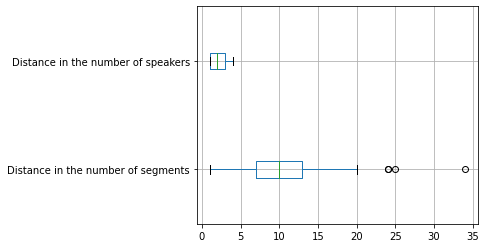

In [51]:
import matplotlib.pyplot as plt
import pandas as pd
x = [list(new_df['distance'].values),
     list(new_df['speaker_distance'].values)]
df = pd.DataFrame(x, index=['Distance in the number of segments', 'Distance in the number of speakers'])


df.T.boxplot(vert=False, figsize=(20,10))
plt.subplots_adjust(left=0.25)
plt.show()